<h1 style='color:#5E7AFF'>Eulerian numbers</h1> 
<h3 style='color:#5E7AFF'>A companion to 
<a href="https://oeis.org/A342321">A342321</a> and
<a href="https://oeis.org/A356601">A356601</a>.</h3>
<h4 style='color:#708090'>Peter Luschny, Aug 2022</h4>
<p>You can download this SageMath notebook from <a href='https://github.com/PeterLuschny/EulerianSecondOrderNumbers'>GitHub</a>.</p>


In [25]:
from functools import cache
from sage.all import ZZ, factorial, binomial, bernoulli_polynomial, rising_factorial, stirling_number2, is_prime, divisors, denominator, lcm, product, plot
from sage.symbolic.integration.integral import definite_integral

<p style="color:brown;font-size:large">Indexing the first-order Eulerian numbers comes in three flavors: 
<a href="https://oeis.org/A008292">A008292</a> (following Riordan and Comtet),
<a href="https://oeis.org/A173018">A173018</a> (following Graham, Knuth, and Patashnik),
and <a href="https://oeis.org/A123125">A123125</a>. We use the definition 
<a href="https://oeis.org/A173018">A173018</a>.</p>

<h2 style='color:#5E7AFF;margin-bottom:16px'>Formula <span style='color:orange'>1</span></h2> 

<p style="color:brown;font-size:large">The (first-order) Eulerian numbers <a href="https://oeis.org/A173018">A173018</a>.</p>

$$ \left\langle n\atop  k\right\rangle = 0^k \ \ (n = k), $$
$$ \left\langle n\atop  k\right\rangle  = 0 \ \ (k \lt 0\ | \ k \gt n), $$ 
$$ (k+1)\left\langle n-1\atop  k\right\rangle  + (n-k)\, \left\langle n-1\atop  k-1\right\rangle . $$


In [26]:
@cache
def E(n, k):
    if n == k: return 0^k
    if k < 0 or k > n: return 0
    return (k + 1) * E(n - 1, k) + (n - k) * E(n - 1, k - 1)


for n in range(10):
    print([E(n, k) for k in range(n + 1)])


[1]
[1, 0]
[1, 1, 0]
[1, 4, 1, 0]
[1, 11, 11, 1, 0]
[1, 26, 66, 26, 1, 0]
[1, 57, 302, 302, 57, 1, 0]
[1, 120, 1191, 2416, 1191, 120, 1, 0]
[1, 247, 4293, 15619, 15619, 4293, 247, 1, 0]
[1, 502, 14608, 88234, 156190, 88234, 14608, 502, 1, 0]


<h2 style='color:#5E7AFF;margin-bottom:16px'>Formula <span style='color:orange'>2</span></h2>

<p style="color:brown;font-size:large">The Bernoulli numbers $\operatorname{B}_{n}$ as used here have $ \operatorname{B}_{1} = 1/2 $. Note that Donald Knuth switched to this definition in TAOCP, vol. 1 since 47-th printing, Oct. 2021, and in Concrete Mathematics, since 34-th printing, Jan. 2022.</p>

$$\operatorname{B}_{n} = \frac{1}{n+1}\, \sum_{k=0}^{n}  
(-1)^{k}\frac{ \left\langle n\atop k \right\rangle}{\binom{n}{k}} \quad(n \ge 0).$$

In [27]:
def b(n):
    return sum((-1)^k * E(n, k) / binomial(n, k) for k in range(n + 1)) // (n + 1)


print([bernoulli_polynomial(1, n) for n in range(13)])
print([b(n) for n in range(13)])


[1, 1/2, 1/6, 0, -1/30, 0, 1/42, 0, -1/30, 0, 5/66, 0, -691/2730]
[1, 1/2, 1/6, 0, -1/30, 0, 1/42, 0, -1/30, 0, 5/66, 0, -691/2730]


<h2 style='color:#5E7AFF;margin-bottom:16px'>Formula <span style='color:orange'>3</span></h2>

<p style="color:brown;font-size:large">The <em>Eulberian polynomials</em>. See OEIS
<a href="https://oeis.org/A342321">A342321</a>,
   <a href="https://oeis.org/A343277">A343277</a>, and 
   <a href="https://oeis.org/A356601">A356601</a>.</p>

$$\operatorname{\beta}_{n}(x) = \frac{1}{n+1}\, \sum_{k=0}^{n}  
(-1)^{k}\frac{ \left\langle n\atop k \right\rangle}{\binom{n}{k}}\, x^{n-k} \quad(n \ge 0).$$

  <style>
    table.cineTable {
      border: 6px solid silver;
      background-color: #fcfbf1;
      width: 100%;
      text-align: center;
      color: royalblue;
    }

    table.cineTable td,
    table.cineTable th {
      border: 1px solid silver;
      padding: 4px 4px;
    }

    table.cineTable tbody td {
      font-size: 15px;
    }

    table.cineTable thead {
      background: silver;
    }

    table.cineTable thead th {
      font-size: 17px;
      font-weight: 500;
      color: blue;
      text-align: center;
      border-left: 2px solid silver;
    }

    table.cineTable thead th:first-child {
      border-left: none;
    }

    table.cineTable tfoot {
      font-size: 16px;
      font-weight: bold;
      color: #F0F0F0;
      background: #948473;
    }

    table.cineTable tfoot td {
      font-size: 16px;
    }
  </style>

  <table class="cineTable">
    <thead>
      <tr>
        <th>x<sup>0</sup></th>
        <th>x<sup>1</sup></th>
        <th>x<sup>2</sup></th>
        <th>x<sup>3</sup></th>
        <th>x<sup>4</sup></th>
        <th>x<sup>5</sup></th>
        <th>&#x2211;</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>+ 1</td>
        <td>&#183;</td>
        <td>&#183;</td>
        <td>&#183;</td>
        <td>&#183;</td>
        <td>&#183;</td>
        <td>1</td>
      </tr>
      <tr>
        <td>0</td>
        <td>+ 1 / 2</td>
        <td>&#183;</td>
        <td>&#183;</td>
        <td>&#183;</td>
        <td>&#183;</td>
        <td>1 / 2</td>
      </tr>
      <tr>
        <td>0</td>
        <td>- 1/ 6</td>
        <td>+ 1 / 3</td>
        <td>&#183;</td>
        <td>&#183;</td>
        <td>&#183;</td>
        <td>1 / 6</td>
      </tr>
      <tr>
        <td>0</td>
        <td>+ 1 / 12</td>
        <td>- 1 / 3</td>
        <td>+ 1 / 4</td>
        <td>&#183;</td>
        <td>&#183;</td>
        <td>0</td>
      </tr>
      <tr>
        <td>0</td>
        <td>- 1 / 20</td>
        <td>+ 11 / 30</td>
        <td>- 11 / 20</td>
        <td>+ 1 / 5</td>
        <td>&#183;</td>
        <td>-1 / 30</td>
      </tr>
      <tr>
        <td>0</td>
        <td>+ 1 / 30</td>
        <td>- 13 / 30</td>
        <td>+ 11 / 10</td>
        <td>- 13 / 15</td>
        <td>+ 1 / 6</td>
        <td>0</td>
      </tr>
    </tbody>
  </table>

In [28]:
def eulberian(n, x):
    return sum(
        (-1)^k * x^(n - k) * E(n, k) / binomial(n, k) for k in range(n + 1)
    ) / (n + 1)


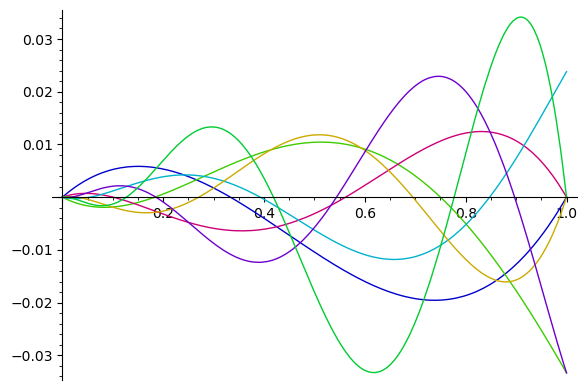

In [29]:
plot([eulberian(n, x) for n in range(3, 10)], (x, 0, 1))

In [30]:
def eb(n, x):
    w = sum(E(n, k) * x^(k + 1) * (x - 1)^(n - k - 1) for k in range(n + 1))
    return definite_integral(w, x, 0, 1)


print([1] + [eb(n, x) for n in range(1, 13)])


[1, 1/2, 1/6, 0, -1/30, 0, 1/42, 0, -1/30, 0, 5/66, 0, -691/2730]


<h2 style='color:#5E7AFF;margin-bottom:16px'>Formula <span style='color:orange'>4</span></h2>

<p style="color:brown;font-size:large">See <a href="https://oeis.org/A356546">A356546</a>. The numbers generate a triangle which is the counterpart of Leibniz's harmonic triangle <a href="https://oeis.org/A003506">A003506</a>, which is generated when the falling factorial is used instead.</p>

 $$ F(n,k) \, = \, \frac{ (n+1)^{ \overline{n} } }{ k! \, (n-k)! },$$

In [31]:
def F(n, k):
    return rising_factorial(n + 1, n) // (factorial(k) * factorial(n - k))


for n in range(9):
    print([F(n, k) for k in range(n + 1)])


[1]
[2, 2]
[6, 12, 6]
[20, 60, 60, 20]
[70, 280, 420, 280, 70]
[252, 1260, 2520, 2520, 1260, 252]
[924, 5544, 13860, 18480, 13860, 5544, 924]
[3432, 24024, 72072, 120120, 120120, 72072, 24024, 3432]
[12870, 102960, 360360, 720720, 900900, 720720, 360360, 102960, 12870]


<h2 style='color:#5E7AFF;margin-bottom:16px'>Formula <span style='color:orange'>5</span></h2>

$$ \frac{\operatorname{B}_n}{\operatorname{C}_n} \, = \, \sum_{k=0}^{n} (-1)^{k} \frac{E(n, k)}{F(n,k)},$$ 
<p style="color:brown;font-size:large">where C<sub>n</sub> denote the Catalan numbers.
A proof of this identity was given by Marko Riedel at <a href="https://math.stackexchange.com/questions/4512142">MSE</a>.</p>

In [32]:
def catalan(n):
    return binomial(2 * n, n) // (n + 1)


def lhs(n):
    return bernoulli_polynomial(1, n) / catalan(n)


def rhs(n):
    return sum((-1)^k * E(n, k) / F(n, k) for k in range(n + 1))


print([lhs(n) for n in range(13)])
print([rhs(n) for n in range(13)])


[1, 1/2, 1/12, 0, -1/420, 0, 1/5544, 0, -1/42900, 0, 5/1108536, 0, -691/567872760]
[1, 1/2, 1/12, 0, -1/420, 0, 1/5544, 0, -1/42900, 0, 5/1108536, 0, -691/567872760]


<h2 style='color:#5E7AFF;margin-bottom:16px'>Formula <span style='color:orange'>6</span></h2>

<p style="color:brown;font-size:large">The <em>Berling polynomials</em> are based on the Stirling set numbers.</p>

$$\operatorname{\sigma}_{n}(x) =  \sum_{k=0}^{n}  
\frac{ (-1)^{n-k}} {k+1} \left \{ n\atop k \right \} \, k! \, x^{k} \quad(n \ge 0).$$

In [33]:
def S(n, x):
    return sum(
        (-1)^(n - k) * stirling_number2(n, k) * factorial(k) * x^k / (k + 1)
        for k in range(n + 1)
    )


for n in range(7):
    print(S(n, x).list())


[1]
[0, 1/2]
[0, -1/2, 2/3]
[0, 1/2, -2, 3/2]
[0, -1/2, 14/3, -9, 24/5]
[0, 1/2, -10, 75/2, -48, 20]
[0, -1/2, 62/3, -135, 312, -300, 720/7]


<h2 style='color:#5E7AFF;margin-bottom:16px'>Formula <span style='color:orange'>7</span></h2>
<p style="color:brown;font-size:large">Clausen numbers <a href="https://oeis.org/A160014">A160014</a>.</p>

$$ \operatorname{C}_{n} = \prod_{ p\, -\, 1\, |\, n} p \quad (p \ \, \text{prime}) $$ 

In [34]:
def Clausen(n):
    if n == 0: return 1
    return product(filter(lambda s: is_prime(s), map(lambda i: i + 1, divisors(n))))


print([Clausen(n) for n in range(16)])


[1, 2, 6, 2, 30, 2, 42, 2, 30, 2, 66, 2, 2730, 2, 6, 2]


In [35]:
print([lcm([denominator(s) for s in S(n, x).list()]) for n in range(16)])


[1, 2, 6, 2, 30, 2, 42, 2, 30, 2, 66, 2, 2730, 2, 6, 2]


<h2 style='color:#5E7AFF;margin-bottom:16px'>Formula <span style='color:orange'>8</span></h2>

<p style="color:brown;font-size:large">Berling polynomials times Clausen numbers convert the rational polynomials to integer polynomials
<a href="https://oeis.org/A194587">A194587</a>.</p>

In [36]:
for n in range(7):
    print([Clausen(n) * s for s in S(n, x).list()])


[1]
[0, 1]
[0, -3, 4]
[0, 1, -4, 3]
[0, -15, 140, -270, 144]
[0, 1, -20, 75, -96, 40]
[0, -21, 868, -5670, 13104, -12600, 4320]


|x^0|x^1 |x^2 |x^3   |x^4   |x^5    |x^6  |
|-  |-   |-   |-     |-     |-      |-    |
|1  |.   |.   |.     |.     |.      |.    |
|0  | 1  |.   |.     |.     |.      |.    |
|0  | -3 | 4  |.     |.     |.      |.    |
|0  | 1  | -4 | 3    |.     |.      |.    |
|0  | -15| 140| -270 | 144  |.      |.    |
|0  | 1  | -20| 75   | -96  | 40    | .   |
|0  | -21| 868| -5670| 13104| -12600| 4320|

<p style="color:brown;font-size:large">P.S.: If you like Eulerian numbers you might also want to have a look at this notebook: <a href='https://github.com/PeterLuschny/EulerianSecondOrderNumbers/blob/main/Eulerian2_A340556.ipynb'>EulerianSecondOrderNumbers</a>.</p>

<p style="color:brown;font-size:large">~~~</p>